In [1]:
# paquetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from datetime import date, timedelta
import datetime
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# lectura de datos
df = pd.read_csv('https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD&bom=true&format=true')
confirmed = pd.read_csv('https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv')
recover = pd.read_csv('https://data.humdata.org/hxlproxy/data/download/time_series_covid19_recovered_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# tamaños
print('Dimensiones base datos abiertos:', df.shape)
print('Dimensiones base datos globales casos confirmados:', confirmed.shape)
print('Dimensiones base datos globales muertes:', deaths.shape)
print('Dimensiones base datos globales recuperados:', recover.shape)

Dimensiones base datos abiertos: (590520, 21)
Dimensiones base datos globales casos confirmados: (58521, 10)
Dimensiones base datos globales muertes: (58521, 10)
Dimensiones base datos globales recuperados: (55661, 10)


In [4]:
df.head(5)

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN


In [5]:
## Exploración Datos Abiertos:
df.columns  = map(str.lower, df.columns) # volver minuscula las columnas

# Explorar campos:
print('ciudades con casos reportados: ', len(df['código divipola'].unique()))
print('tipos de estados ',  df['estado'].unique())
print('tipos de atención: ',  df['atención'].unique())
print('paises de procedencia: ',  len(df['país de procedencia'].unique()))
print('pertenencia etnica: ',  df['pertenencia etnica'].unique())
print('nombres grupos etnicos: ',  len(df['nombre grupo etnico'].unique()))
print('Sexos: ',  df['sexo'].unique())

ciudades con casos reportados:  1017
tipos de estados  ['Leve' 'Asintomático' 'Fallecido' 'Moderado' 'Grave' nan]
tipos de atención:  ['Recuperado' 'Fallecido' 'Hospital' 'Hospital UCI' nan 'Casa']
paises de procedencia:  49
pertenencia etnica:  ['Otro' nan 'Indígena' 'Negro' 'Rom']
nombres grupos etnicos:  89
Sexos:  ['F' 'M' 'm' 'f']


In [6]:
# Pasar a minuscula
df['estado'] = df['estado'].str.lower()
df['atención'] = df['atención'].str.lower()
df['pertenencia etnica'] = df['pertenencia etnica'].str.lower()
df['sexo'] = df['sexo'].str.lower()
df['ciudad de ubicación'] = df['ciudad de ubicación'].str.lower()

In [7]:
df.columns

Index(['id de caso', 'fecha de notificación', 'código divipola',
       'ciudad de ubicación', 'departamento o distrito ', 'atención', 'edad',
       'sexo', 'tipo', 'estado', 'país de procedencia', 'fis',
       'fecha de muerte', 'fecha diagnostico', 'fecha recuperado',
       'fecha reporte web', 'tipo recuperación', 'codigo departamento',
       'codigo pais', 'pertenencia etnica', 'nombre grupo etnico'],
      dtype='object')

In [8]:
df.head(3)

,id de caso,fecha de notificación,código divipola,ciudad de ubicación,departamento o distrito,atención,edad,sexo,tipo,estado,país de procedencia,fis,fecha de muerte,fecha diagnostico,fecha recuperado,fecha reporte web,tipo recuperación,codigo departamento,codigo pais,pertenencia etnica,nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,bogotá d.c.,Bogotá D.C.,recuperado,19,f,Importado,leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,otro,NaN
1,2,2020-03-06T00:00:00.000,76111,guadalajara de buga,Valle del Cauca,recuperado,34,m,Importado,leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,otro,NaN
2,3,2020-03-07T00:00:00.000,5001,medellín,Antioquia,recuperado,50,f,Importado,leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,otro,NaN


In [9]:
# organizar fechas
fechas = ['fecha de notificación','fecha diagnostico','fis','fecha de muerte','fecha recuperado','fecha reporte web']

for i in range(len(fechas)):
  df[fechas[i]] = df[fechas[i]].apply(lambda x: str(x)[0:4]+'-'+str(x)[5:7]+'-'+str(x)[8:10]) # quitar hora de la fecha y convertir en formato
  df[fechas[i]] = pd.to_datetime(df[fechas[i]], format = '%Y-%m-%d', errors='coerce' ) # convertir a formato fecha

In [10]:
# valores nulos
pd.DataFrame(df.isnull().sum()).reset_index().rename(columns = {'index':'variables',0:'campos nulos'}).sort_values('campos nulos', ascending = False)

,variables,campos nulos
10,país de procedencia,589559
18,codigo pais,589558
20,nombre grupo etnico,582381
12,fecha de muerte,570631
19,pertenencia etnica,310239
16,tipo recuperación,160900
14,fecha recuperado,160895
11,fis,69460
13,fecha diagnostico,3843
9,estado,1273


In [11]:
df[df['atención'].isnull()].groupby('estado')[['id de caso']].count().reset_index()

,estado,id de caso
0,asintomático,62


In [12]:
# remplazar valores nulos
df['atención'] = df.apply(lambda x: 'casa' if pd.isnull(x['atención']) and pd.notnull(x['estado']) else x['atención'], axis =1)
df['fecha diagnostico'].fillna(df['fecha de notificación'], inplace = True)

In [13]:
# % de casos por tipo de atención
c = df.groupby(['atención'])[['id de caso']].count().reset_index()
c['%'] = c.apply(lambda x: round(x['id de caso']/c['id de caso'].sum(),2)*100, axis = 1)
c.rename(columns ={'id de caso':'casos','atención':'tipo atención'}).sort_values('%', ascending = False)

,tipo atención,casos,%
4,recuperado,429620,73.0
0,casa,118870,20.0
1,fallecido,18767,3.0
2,hospital,20160,3.0
3,hospital uci,1958,0.0


In [14]:
# % de casos por tipo de estado
c = df.groupby(['estado'])[['id de caso']].count().reset_index()
c['%'] = c.apply(lambda x: round(x['id de caso']/c['id de caso'].sum(),2)*100, axis = 1)
c.rename(columns ={'id de caso':'casos'}).sort_values('%', ascending = False)

,estado,casos,%
3,leve,477190,81.0
0,asintomático,69460,12.0
4,moderado,21713,4.0
1,fallecido,18767,3.0
2,grave,2117,0.0


In [15]:
# % de casos por tipo de país de procedencia
c = df.groupby(['país de procedencia'])[['id de caso']].count().reset_index()
c['%'] = c.apply(lambda x: round(x['id de caso']/c['id de caso'].sum(),2)*100, axis = 1)
c.rename(columns ={'id de caso':'casos'}).sort_values('%', ascending = False).head(5)

,país de procedencia,casos,%
18,ESPAÑA,265,28.0
19,ESTADOS UNIDOS,217,23.0
15,ECUADOR,68,7.0
7,BRASIL,61,6.0
32,MÉXICO,53,6.0


In [16]:
# % de casos por pertenencia etnica
c = df.groupby(['pertenencia etnica'])[['id de caso']].count().reset_index()
c['%'] = c.apply(lambda x: round(x['id de caso']/c['id de caso'].sum(),2)*100, axis = 1)
c.rename(columns ={'id de caso':'casos'}).sort_values('%', ascending = False).head(5)

,pertenencia etnica,casos,%
2,otro,253968,91.0
1,negro,18165,6.0
0,indígena,8140,3.0
3,rom,8,0.0


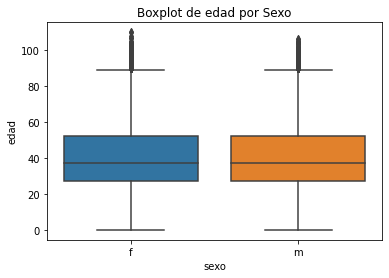

In [17]:
ax = sns.boxplot(x='sexo', y='edad', data=df)
ax.set_title('Boxplot de edad por Sexo');

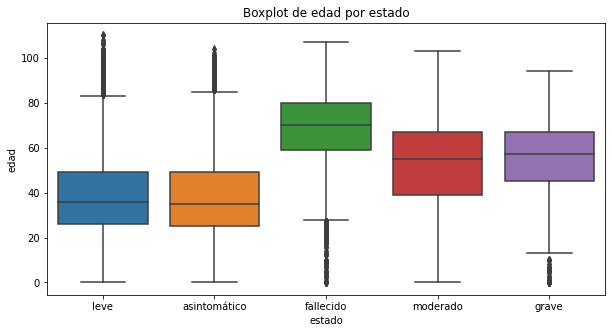

In [18]:
plt.figure(figsize = (10,5));
ax = sns.boxplot(x='estado', y='edad', data=df)
ax.set_title('Boxplot de edad por estado');

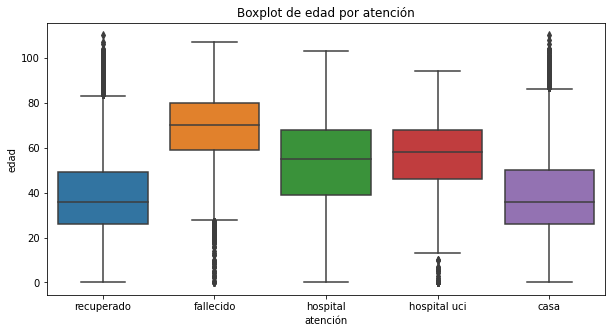

In [19]:
plt.figure(figsize = (10,5));
ax = sns.boxplot(x='atención', y='edad', data=df)
ax.set_title('Boxplot de edad por atención');

In [20]:
#El objetivo de este proyecto es la predicción de corto y mediano plazo del total de casos confirmados, 
#los nuevos casos, los casos activos, recuperados y muertes para las 5 principales ciudades.
#utilizando técnicas estadísticas, de inteligencia artificial o modelos híbridos.

#Bogotá: confirmados y activos
#Arima - Arma - Ma:
#Var: ARCH- GARCH


<Figure size 1440x360 with 0 Axes>

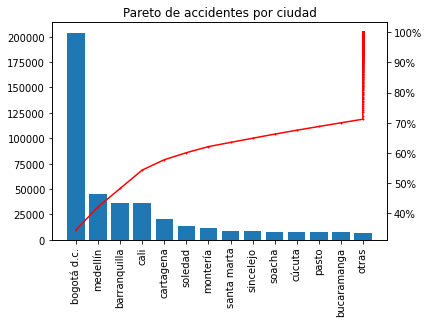

In [21]:
plt.figure(figsize = (20,5));
fig, ax = plt.subplots();

x = df.groupby(['ciudad de ubicación'])[['id de caso']].count().reset_index().rename(columns ={'ciudad de ubicación':'ciudad','id de caso':'casos'})
x.sort_values('casos', ascending= False, inplace = True)
x['cum_per'] = x['casos'].cumsum()/x['casos'].sum()*100
x['ciudad'].replace({'cartagena de indias':'cartagena'}, inplace = True)
x['ciudad2'] = x.apply(lambda x: 'otras' if x['cum_per']>70 else x['ciudad'], axis = 1)

ax.bar(x.ciudad2, x.casos, color='C0')
ax2 = ax.twinx()
ax2.plot(x.ciudad2, x['cum_per'], color='red', marker="o", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xticklabels(x.ciudad2, rotation=90)
ax.set_title('Pareto de accidentes por ciudad');

In [22]:
# filtrar base
fecha = ['fecha de notificación','fecha diagnostico','fis']

fn_f = df[df['atención']=='fallecido'].groupby(['ciudad de ubicación','fecha de muerte'])[['id de caso']].count().reset_index() # fallecidos
fn_r = df[df['atención']=='recuperado'].groupby(['ciudad de ubicación','fecha recuperado'])[['id de caso']].count().reset_index() # recuperados
fn_n = df.groupby(['ciudad de ubicación',fecha[0]])[['id de caso']].count().reset_index()# nuevos


fd_f = df[df['atención']=='fallecido'].groupby(['ciudad de ubicación','fecha de muerte'])[['id de caso']].count().reset_index() # fallecidos
fd_r = df[df['atención']=='recuperado'].groupby(['ciudad de ubicación','fecha recuperado'])[['id de caso']].count().reset_index() # recuperados
fd_n = df.groupby(['ciudad de ubicación',fecha[1]])[['id de caso']].count().reset_index()# nuevos


fis_f = df[df['atención']=='fallecido'].groupby(['ciudad de ubicación','fecha de muerte'])[['id de caso']].count().reset_index() # fallecidos
fis_r = df[df['atención']=='recuperado'].groupby(['ciudad de ubicación','fecha recuperado'])[['id de caso']].count().reset_index() # recuperados
fis_n = df.groupby(['ciudad de ubicación',fecha[2]])[['id de caso']].count().reset_index()# nuevos

In [23]:
# crear columna con todas las fechas desde la minima hasta la maxima fecha
df0 = pd.DataFrame(pd.date_range(start=df[fecha[0]].min()+ datetime.timedelta(days=3), end= df[fecha[0]].max())- datetime.timedelta(days=3)).rename(columns = {0:'fecha'})
df1 = pd.DataFrame(pd.date_range(start=df[fecha[1]].min()+ datetime.timedelta(days=3), end= df[fecha[1]].max())- datetime.timedelta(days=3)).rename(columns = {0:'fecha'})
df2 = pd.DataFrame(pd.date_range(start=df[fecha[2]].min()+ datetime.timedelta(days=3), end= df[fecha[2]].max())- datetime.timedelta(days=3)).rename(columns = {0:'fecha'})

# crear lista de ciudades
lista = ['bogotá d.c.','medellín','barranquilla','cartagena', 'cali']

# agregar información por ciudad en la fecha de notificación
for i in lista:
  df0 = pd.merge(df0, fn_f[fn_f['ciudad de ubicación'] == i][['fecha de muerte','id de caso']], how ='left', left_on ='fecha', right_on = 'fecha de muerte').drop('fecha de muerte', axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_f'})
  df0 = pd.merge(df0, fn_r[fn_r['ciudad de ubicación'] == i][['fecha recuperado','id de caso']], how ='left', left_on ='fecha', right_on = 'fecha recuperado').drop('fecha recuperado', axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_r'})
  df0 = pd.merge(df0, fn_n[fn_n['ciudad de ubicación'] == i][[fecha[0],'id de caso']], how ='left', left_on ='fecha', right_on = fecha[0]).drop(fecha[0], axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_n'})


# agregar información por ciudad en la fecha de diagnostico
for i in lista:
  df1 = pd.merge(df1, fd_f[fd_f['ciudad de ubicación'] == i][['fecha de muerte','id de caso']], how ='left', left_on ='fecha', right_on = 'fecha de muerte').drop('fecha de muerte', axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_f'})
  df1 = pd.merge(df1, fd_r[fd_r['ciudad de ubicación'] == i][['fecha recuperado','id de caso']], how ='left', left_on ='fecha', right_on = 'fecha recuperado').drop('fecha recuperado', axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_r'})
  df1 = pd.merge(df1, fd_n[fd_n['ciudad de ubicación'] == i][[fecha[1],'id de caso']], how ='left', left_on ='fecha', right_on = fecha[1]).drop(fecha[1], axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_n'})

# agregar información por ciudad en la fecha fis
for i in lista:
  df2 = pd.merge(df2, fis_f[fis_f['ciudad de ubicación'] == i][['fecha de muerte','id de caso']], how ='left', left_on ='fecha', right_on = 'fecha de muerte').drop('fecha de muerte', axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_f'})
  df2 = pd.merge(df2, fis_r[fis_r['ciudad de ubicación'] == i][['fecha recuperado','id de caso']], how ='left', left_on ='fecha', right_on = 'fecha recuperado').drop('fecha recuperado', axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_r'})
  df2 = pd.merge(df2, fis_n[fis_n['ciudad de ubicación'] == i][[fecha[2],'id de caso']], how ='left', left_on ='fecha', right_on = fecha[2]).drop(fecha[2], axis = 1).rename(columns ={'id de caso': str(i)[0:3] + '_n'})
  

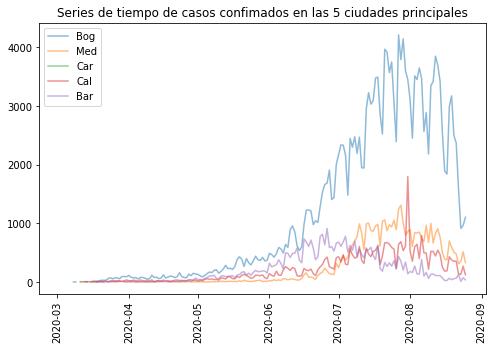

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df0['fecha'], df0['bog_n'], alpha=0.5, label='Bog')
plt.plot(df0['fecha'], df0['med_n'], alpha=0.5, label='Med')
plt.plot(df0['fecha'], df0['car_n'], alpha=0.5, label='Car')
plt.plot(df0['fecha'], df0['cal_n'], alpha=0.5, label='Cal')
plt.plot(df0['fecha'], df0['bar_n'], alpha=0.5, label='Bar')
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Series de tiempo de casos confimados en las 5 ciudades principales')
plt.show();

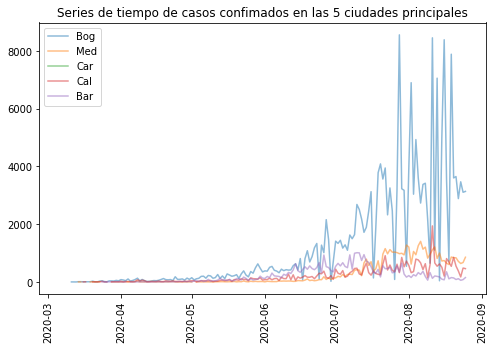

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df1['fecha'], df1['bog_n'], alpha=0.5, label='Bog')
plt.plot(df1['fecha'], df1['med_n'], alpha=0.5, label='Med')
plt.plot(df1['fecha'], df1['car_n'], alpha=0.5, label='Car')
plt.plot(df1['fecha'], df1['cal_n'], alpha=0.5, label='Cal')
plt.plot(df1['fecha'], df1['bar_n'], alpha=0.5, label='Bar')
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Series de tiempo de casos confimados en las 5 ciudades principales')
plt.show();

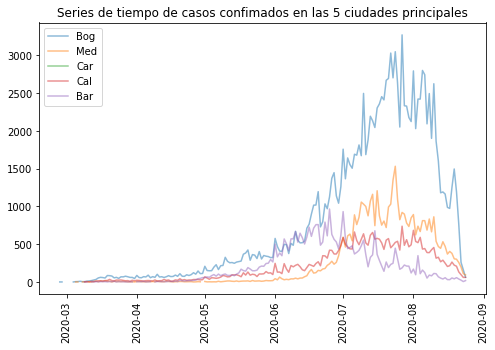

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df2['fecha'], df2['bog_n'], alpha=0.5, label='Bog')
plt.plot(df2['fecha'], df2['med_n'], alpha=0.5, label='Med')
plt.plot(df2['fecha'], df2['car_n'], alpha=0.5, label='Car')
plt.plot(df2['fecha'], df2['cal_n'], alpha=0.5, label='Cal')
plt.plot(df2['fecha'], df2['bar_n'], alpha=0.5, label='Bar')
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Series de tiempo de casos confimados en las 5 ciudades principales')
plt.show();

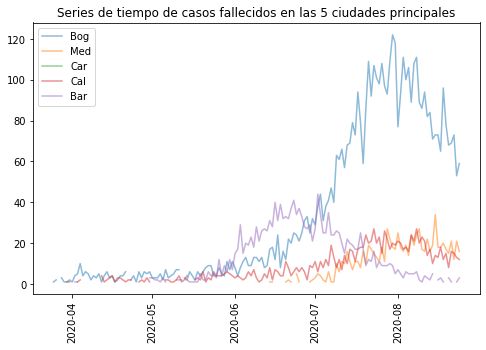

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df2['fecha'], df2['bog_f'], alpha=0.5, label='Bog')
plt.plot(df2['fecha'], df2['med_f'], alpha=0.5, label='Med')
plt.plot(df2['fecha'], df2['car_f'], alpha=0.5, label='Car')
plt.plot(df2['fecha'], df2['cal_f'], alpha=0.5, label='Cal')
plt.plot(df2['fecha'], df2['bar_f'], alpha=0.5, label='Bar')
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Series de tiempo de casos fallecidos en las 5 ciudades principales')
plt.show();

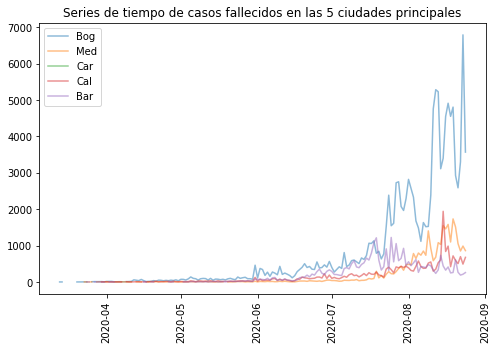

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df2['fecha'], df2['bog_r'], alpha=0.5, label='Bog')
plt.plot(df2['fecha'], df2['med_r'], alpha=0.5, label='Med')
plt.plot(df2['fecha'], df2['car_r'], alpha=0.5, label='Car')
plt.plot(df2['fecha'], df2['cal_r'], alpha=0.5, label='Cal')
plt.plot(df2['fecha'], df2['bar_r'], alpha=0.5, label='Bar')
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Series de tiempo de casos fallecidos en las 5 ciudades principales')
plt.show();

In [37]:
df2.columns

Index(['fecha', 'bog_f', 'bog_r', 'bog_n', 'med_f', 'med_r', 'med_n', 'bar_f',
       'bar_r', 'bar_n', 'car_f', 'car_r', 'car_n', 'cal_f', 'cal_r', 'cal_n'],
      dtype='object')

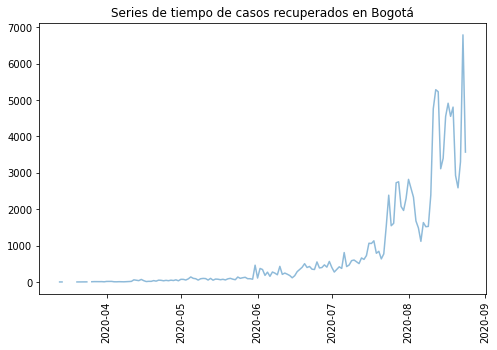

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df2['fecha'], df2['bog_r'], alpha=0.5)
plt.xticks(rotation = 90)
plt.title('Series de tiempo de casos recuperados en Bogotá')
plt.savefig('docs/b1.png');


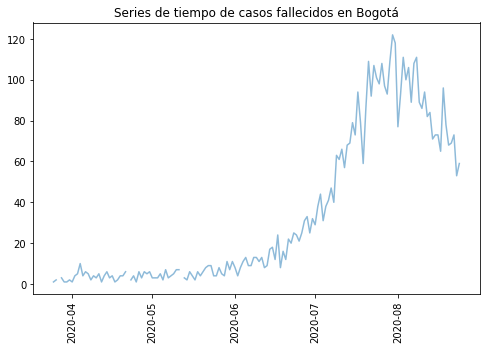

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.plot(df2['fecha'], df2['bog_f'], alpha=0.5)
plt.xticks(rotation = 90)
plt.title('Series de tiempo de casos fallecidos en Bogotá')
plt.savefig('docs/b2.png');

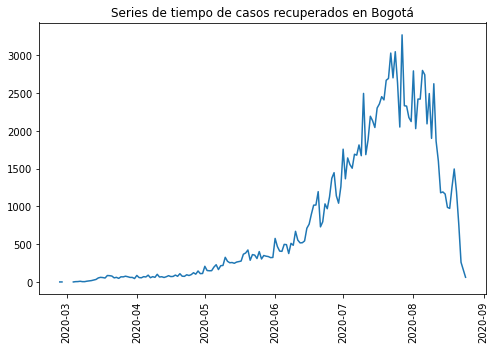

In [68]:
from pylab import rcParams
plt.plot(df2['fecha'], df2['bog_n'])
plt.xticks(rotation = 90)
plt.title('Series de tiempo de casos recuperados en Bogotá')
plt.savefig('docs/b3.png');

In [69]:
dprueba = [df2['bog_r'].sum(), df2['bog_f'].sum(), df2['bog_n'].sum()]
nprueba = ['Recuperados','Fallecidos','Nuevos']

In [83]:
prueba = [n+': '+str(m) for m,n in zip(dprueba,nprueba)]

In [98]:
prueba1 = list(zip(dprueba,nprueba))

In [94]:
+fua = df2['fecha'].max().strftime("%Y-%m-%d")


In [102]:
!cat templates/index.html

<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <title>Dashboard Admin Template by Tooplate.com</title>
    <!--

    Template 2108 Dashboard

	http://www.tooplate.com/view/2108-dashboard

    -->
    <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600">
    <!-- https://fonts.google.com/specimen/Open+Sans -->
    <link rel="stylesheet" href="css/fontawesome.min.css">
    <!-- https://fontawesome.com/ -->
    <link rel="stylesheet" href="css/fullcalendar.min.css">
    <!-- https://fullcalendar.io/ -->
    <link rel="stylesheet" href="css/bootstrap.min.css">
    <!-- https://getbootstrap.com/ -->
    <link rel="stylesheet" href="css/tooplate.css">

</head>

<body id="reportsPage">
    <div class="" id="home">
        <div class="container">
			<div class="row">
				<div class="col-12">
					<a 

In [103]:
from jinja2 import Template

##
## Carga el template almacenado como una cadena de texto
##
template = Template(open('templates/index.html', 'rt').read())

##
## Genera el archivo index.html pasando en la variable articles 
## de la plantilla, el conteido de la variable most_cited
##
open("docs/index.html","w").write( template.render(datos = prueba1, fua = fua))

9020